# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime 
from datetime import date

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Start url query
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={api_key}&units={units}&q="


In [15]:
# Set up empty dataframe
cities_df = pd.DataFrame({
    'City': cities,
    'Cloudiness':'',
    'Country':'',
    'Date':'',
    'Humidity':'',
    'Lat':'',
    'Lng':'',
    'Max Temp':'',
    'Wind Speed':''
})

print("Beginning Data Retrieval\n-----------------------------")

counter = 1
page = 1

# Iterate through each city and retrieve data from JSON
for index, row in cities_df.iterrows():
    
    # Find Set #
    if counter == 51: 
        counter = 1
        page += 1
    else:
        pass
    
    try:     
        # Query the API per city
        response = requests.get(query_url + row['City']).json()
        print(f"Processing record {counter} of Set {page} | {row['City']}")

        # If no weather data is found, raise exception
        if response['cod'] == '400':
            raise KeyError
              
        # Otherwise fill dataframe with the JSON data
        else:
            row['Cloudiness'] = response['clouds']['all']
            row['Country'] = response['sys']['country']
            row['Date'] = response['dt']
            row['Humidity'] = response['main']['humidity']
            row['Lat'] = response['coord']['lat']
            row['Lng'] = response['coord']['lon']
            row['Max Temp'] = response['main']['temp_max']
            row['Wind Speed'] = response['wind']['speed']
            
    except (KeyError, IndexError):
        print("City not found. Skipping...")

    counter += 1
              
print("-----------------------------\nData Retrieval Complete\n-----------------------------")        


Beginning Data Retrieval
-----------------------------
Processing record 1 of Set 1 | kruisfontein
Processing record 2 of Set 1 | arman
Processing record 3 of Set 1 | udachnyy
Processing record 4 of Set 1 | saleaula
City not found. Skipping...
Processing record 5 of Set 1 | vaini
Processing record 6 of Set 1 | rikitea
Processing record 7 of Set 1 | tabialan
City not found. Skipping...
Processing record 8 of Set 1 | colares
Processing record 9 of Set 1 | upernavik
Processing record 10 of Set 1 | punta arenas
Processing record 11 of Set 1 | lahij
Processing record 12 of Set 1 | carnarvon
Processing record 13 of Set 1 | zhezkazgan
Processing record 14 of Set 1 | albany
Processing record 15 of Set 1 | bethel
Processing record 16 of Set 1 | damoh
Processing record 17 of Set 1 | butaritari
Processing record 18 of Set 1 | marsabit
Processing record 19 of Set 1 | cape town
Processing record 20 of Set 1 | east london
Processing record 21 of Set 1 | tumannyy
City not found. Skipping...
Processin

Processing record 37 of Set 4 | isla mujeres
Processing record 38 of Set 4 | taoudenni
Processing record 39 of Set 4 | gunjur
Processing record 40 of Set 4 | siocon
Processing record 41 of Set 4 | rio grande
Processing record 42 of Set 4 | aracaju
Processing record 43 of Set 4 | turinsk
Processing record 44 of Set 4 | nizhniy kuranakh
Processing record 45 of Set 4 | bambous virieux
Processing record 46 of Set 4 | puerto colombia
Processing record 47 of Set 4 | vardo
Processing record 48 of Set 4 | nhulunbuy
Processing record 49 of Set 4 | novyye burasy
Processing record 50 of Set 4 | kota belud
Processing record 1 of Set 5 | severo-kurilsk
Processing record 2 of Set 5 | faanui
Processing record 3 of Set 5 | khani
Processing record 4 of Set 5 | huilong
Processing record 5 of Set 5 | bafra
Processing record 6 of Set 5 | vangaindrano
Processing record 7 of Set 5 | yangjiang
Processing record 8 of Set 5 | shimoda
Processing record 9 of Set 5 | zhangye
Processing record 10 of Set 5 | susang

Processing record 24 of Set 8 | vaitape
Processing record 25 of Set 8 | puerto escondido
Processing record 26 of Set 8 | kijang
Processing record 27 of Set 8 | jinchengjiang
City not found. Skipping...
Processing record 28 of Set 8 | yerbogachen
Processing record 29 of Set 8 | belize
City not found. Skipping...
Processing record 30 of Set 8 | cordoba
Processing record 31 of Set 8 | west wendover
Processing record 32 of Set 8 | hohhot
Processing record 33 of Set 8 | saint-georges
Processing record 34 of Set 8 | akureyri
Processing record 35 of Set 8 | milkovo
Processing record 36 of Set 8 | saint george
Processing record 37 of Set 8 | beni suef
Processing record 38 of Set 8 | roald
Processing record 39 of Set 8 | xiaoyi
Processing record 40 of Set 8 | lasa
Processing record 41 of Set 8 | norwich
Processing record 42 of Set 8 | tahta
City not found. Skipping...
Processing record 43 of Set 8 | dingli
Processing record 44 of Set 8 | phan rang
City not found. Skipping...
Processing record 4

Processing record 5 of Set 12 | hedaru
Processing record 6 of Set 12 | manakara
Processing record 7 of Set 12 | kanata
Processing record 8 of Set 12 | paptalaya
Processing record 9 of Set 12 | paris
Processing record 10 of Set 12 | kabul
Processing record 11 of Set 12 | manta
Processing record 12 of Set 12 | omboue
Processing record 13 of Set 12 | villarrica
Processing record 14 of Set 12 | kankipadu
Processing record 15 of Set 12 | bonfim
Processing record 16 of Set 12 | iqaluit
Processing record 17 of Set 12 | bokhan
Processing record 18 of Set 12 | charyshskoye
Processing record 19 of Set 12 | tahlequah
Processing record 20 of Set 12 | agirish
Processing record 21 of Set 12 | takoradi
Processing record 22 of Set 12 | kargala
Processing record 23 of Set 12 | fez
Processing record 24 of Set 12 | kavaratti
Processing record 25 of Set 12 | gat
Processing record 26 of Set 12 | santa maria
Processing record 27 of Set 12 | noumea
Processing record 28 of Set 12 | kadykchan
City not found. S

In [6]:
# Remove rows with no values
cities_df.replace('', np.nan, inplace=True)
cities_df = cities_df.dropna().reset_index(drop=True)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
cities_df.to_csv(output_data_file, index=False, header=True)
cities_df.count()

City          559
Cloudiness    559
Country       559
Date          559
Humidity      559
Lat           559
Lng           559
Max Temp      559
Wind Speed    559
dtype: int64

In [9]:
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,kruisfontein,23.0,ZA,1.571010e+09,94.0,-34.00,24.73,12.84,4.009
1,arman,99.0,RU,1.571010e+09,53.0,59.70,150.17,-4.08,4.558
2,udachnyy,98.0,RU,1.571010e+09,93.0,66.42,112.40,-8.02,5.437
3,vaini,100.0,IN,1.571010e+09,95.0,15.34,74.49,20.66,1.184
4,rikitea,100.0,PF,1.571010e+09,83.0,-23.12,-134.97,21.09,5.696


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

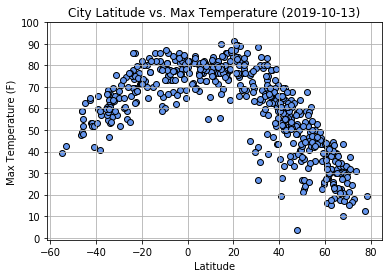

In [10]:
today = date.today()

# Data
latitude = cities_df['Lat']
max_temp_c = cities_df['Max Temp']
max_temp_f = [(temp/0.56 + 32) for temp in max_temp_c]

# Scatter plot
plt.scatter(latitude, max_temp_f, marker="o", facecolors="cornflowerblue", edgecolors="black")
plt.yticks(np.arange(0,max(max_temp_f)+10,10))
plt.grid()

# Labels
plt.title(f'City Latitude vs. Max Temperature ({today})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

plt.show()

#### Latitude vs. Humidity Plot

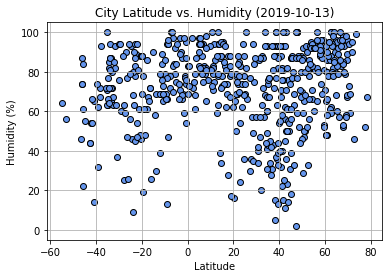

In [11]:
# Data
humidity = cities_df['Humidity']

# Scatter plot
plt.scatter(latitude, humidity, marker="o", facecolors="cornflowerblue", edgecolors="black")
plt.yticks(np.arange(0,120,20))
plt.ylim(-5, 105)
plt.grid()

# Labels
plt.title(f'City Latitude vs. Humidity ({today})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.show()

#### Latitude vs. Cloudiness Plot

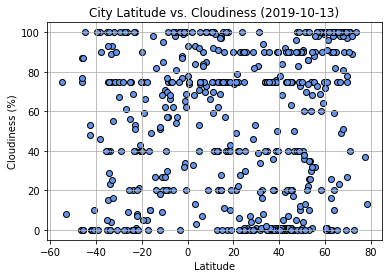

In [12]:
# Data
cloudiness = cities_df['Cloudiness']

# Scatter plot
plt.scatter(latitude, cloudiness, marker="o", facecolors="cornflowerblue", edgecolors="black")
plt.yticks(np.arange(0,120,20))
plt.ylim(-5, 105)
plt.grid()

# Labels
plt.title(f'City Latitude vs. Cloudiness ({today})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.show()

#### Latitude vs. Wind Speed Plot

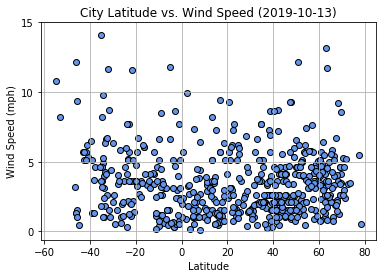

In [13]:
# Data
wind_speed = cities_df['Wind Speed']

# Scatter plot
plt.scatter(latitude, wind_speed, marker="o", facecolors="cornflowerblue", edgecolors="black")
plt.yticks(np.arange(0,max(wind_speed)+5,5))
plt.grid()

# Labels
plt.title(f'City Latitude vs. Wind Speed ({today})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

plt.show()